# Data Collection and Data Pre-processing

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload NHANES Data (2017-2018)

In [2]:
demo  = pd.read_sas("Demographics.XPT")
demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


In [3]:
df_demo = demo[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1']]
df_demo.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1
0,93703.0,2.0,2.0,5.0
1,93704.0,1.0,2.0,3.0
2,93705.0,2.0,66.0,4.0
3,93706.0,1.0,18.0,5.0
4,93707.0,1.0,13.0,5.0


In [4]:
BP = pd.read_sas('Blood_Pressure.XPT')
df_bp = BP[['SEQN', 'BPXSY1','BPXSY2','BPXSY3']]

In [5]:
BM = pd.read_sas('Body_Measures.XPT')
df_bm = BM[['SEQN', 'BMXBMI']]

In [6]:
diabetes = pd.read_sas('Diabetes.XPT')
df_dia = diabetes[['SEQN','DIQ010']]

In [7]:
kidney = pd.read_sas('Kidney.XPT')
df_kidney = kidney[['SEQN','KIQ022']]

In [8]:
smoking = pd.read_sas('Smoking.XPT')
df_smoking = smoking[['SEQN','SMQ020']]

In [9]:
print(df_demo.shape)
print(df_bp.shape)
print(df_bm.shape)
print(df_dia.shape)
print(df_smoking.shape)
print(df_kidney.shape)

(9254, 4)
(8704, 4)
(8704, 2)
(8897, 2)
(6724, 2)
(5569, 2)


# Make a single table containing the selected input features

In [10]:
df_outer = [df_demo,df_bp,df_bm,df_dia,df_smoking,df_kidney]

In [11]:
from functools import reduce
df_inner = reduce(lambda  left,right: pd.merge(left,right,on=['SEQN'], how='inner'), df_outer)
df_inner.shape

(5265, 11)

In [12]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5265 entries, 0 to 5264
Data columns (total 11 columns):
SEQN        5265 non-null float64
RIAGENDR    5265 non-null float64
RIDAGEYR    5265 non-null float64
RIDRETH1    5265 non-null float64
BPXSY1      4659 non-null float64
BPXSY2      4886 non-null float64
BPXSY3      4873 non-null float64
BMXBMI      5175 non-null float64
DIQ010      5265 non-null float64
SMQ020      5265 non-null float64
KIQ022      5265 non-null float64
dtypes: float64(11)
memory usage: 493.6 KB


In [13]:
df_inner.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY1,BPXSY2,BPXSY3,BMXBMI,DIQ010,SMQ020,KIQ022
0,93705.0,2.0,66.0,4.0,NaN,NaN,202.0,31.7,2.0,1.0,2.0
1,93708.0,2.0,66.0,5.0,NaN,138.0,144.0,23.7,3.0,2.0,2.0
2,93709.0,2.0,75.0,4.0,120.0,118.0,118.0,38.9,2.0,1.0,2.0
3,93711.0,1.0,56.0,5.0,108.0,94.0,102.0,21.3,2.0,2.0,2.0
4,93713.0,1.0,67.0,3.0,104.0,104.0,106.0,23.5,2.0,1.0,2.0


In [14]:
df_inner.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY1,BPXSY2,BPXSY3,BMXBMI,DIQ010,SMQ020,KIQ022
count,5265.000000,5265.000000,5265.000000,5265.000000,4659.000000,4886.000000,4873.000000,5175.000000,5265.000000,5265.000000,5265.000000
mean,98287.699335,1.517379,51.410826,3.265147,126.770122,127.008187,126.557767,29.851787,1.877493,1.580437,1.970370
std,2688.406411,0.499745,17.692044,1.252191,19.780053,20.338012,20.142065,7.396302,0.460438,0.493534,0.337437
min,93705.000000,1.000000,20.000000,1.000000,72.000000,72.000000,72.000000,14.200000,1.000000,1.000000,1.000000
25%,95968.000000,1.000000,36.000000,3.000000,112.000000,112.000000,112.000000,24.800000,2.000000,1.000000,2.000000
50%,98274.000000,2.000000,53.000000,3.000000,124.000000,124.000000,124.000000,28.600000,2.000000,2.000000,2.000000
75%,100621.000000,2.000000,65.000000,4.000000,138.000000,138.000000,136.000000,33.600000,2.000000,2.000000,2.000000
max,102956.000000,2.000000,80.000000,5.000000,228.000000,236.000000,238.000000,86.200000,9.000000,2.000000,9.000000


# Upload NHANES Data (2015-2016)

In [15]:
demo2 = pd.read_sas("demographics2.XPT")
df_demo2 = demo2[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1']]
df_demo2.tail()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1
9966,93698.0,1.0,2.0,1.0
9967,93699.0,2.0,6.0,4.0
9968,93700.0,1.0,35.0,3.0
9969,93701.0,1.0,8.0,3.0
9970,93702.0,2.0,24.0,3.0


In [16]:
BP2 = pd.read_sas('blood_pressure2.XPT')
df_bp2 = BP2[['SEQN', 'BPXSY1','BPXSY2','BPXSY3']]
df_bp2.tail()

,SEQN,BPXSY1,BPXSY2,BPXSY3
9539,93698.0,NaN,NaN,NaN
9540,93699.0,NaN,NaN,NaN
9541,93700.0,104.0,106.0,104.0
9542,93701.0,114.0,114.0,114.0
9543,93702.0,118.0,114.0,124.0


In [17]:
BM2 = pd.read_sas('body_measure2.XPT')
df_bm2 = BM2[['SEQN', 'BMXBMI']]
df_bm2.tail()

,SEQN,BMXBMI
9539,93698.0,NaN
9540,93699.0,18.2
9541,93700.0,26.0
9542,93701.0,18.1
9543,93702.0,21.4


In [18]:
diabetes2 = pd.read_sas('diabetes2.XPT')
df_dia2 = diabetes2[['SEQN','DIQ010']]
df_dia2.tail()

,SEQN,DIQ010
9570,93698.0,2.0
9571,93699.0,2.0
9572,93700.0,2.0
9573,93701.0,2.0
9574,93702.0,2.0


In [19]:
kidney2 = pd.read_sas('kidney2.XPT')
df_kidney2 = kidney2[['SEQN','KIQ022']]
df_kidney2.tail()

,SEQN,KIQ022
5714,93695.0,2.0
5715,93696.0,2.0
5716,93697.0,2.0
5717,93700.0,2.0
5718,93702.0,2.0


In [20]:
smoking2 = pd.read_sas('smoking2.XPT')
df_smoking2 = smoking2[['SEQN','SMQ020']]
df_smoking2.tail()

,SEQN,SMQ020
6996,93695.0,1.0
6997,93696.0,2.0
6998,93697.0,1.0
6999,93700.0,1.0
7000,93702.0,2.0


# Make a single table containing the selected input features

In [21]:
df_outer2 = [df_demo2,df_bp2,df_bm2,df_dia2,df_smoking2,df_kidney2]

In [22]:
df_inner2 = reduce(lambda  left,right: pd.merge(left,right,on=['SEQN'], how='inner'), df_outer2)

In [23]:
df_inner2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 0 to 5473
Data columns (total 11 columns):
SEQN        5474 non-null float64
RIAGENDR    5474 non-null float64
RIDAGEYR    5474 non-null float64
RIDRETH1    5474 non-null float64
BPXSY1      5152 non-null float64
BPXSY2      5279 non-null float64
BPXSY3      5254 non-null float64
BMXBMI      5406 non-null float64
DIQ010      5474 non-null float64
SMQ020      5474 non-null float64
KIQ022      5474 non-null float64
dtypes: float64(11)
memory usage: 513.2 KB


In [24]:
#NHANHES 2015-2016
df_inner2.shape

(5474, 11)

In [25]:
#NHANES 2017-2018
df_inner.shape

(5265, 11)

# Joining both the tables 

In [26]:
df = pd.concat([df_inner,df_inner2],ignore_index=True)   

In [27]:
df.shape

(10739, 11)

In [28]:
print(df['RIAGENDR'].value_counts())
print(df['RIDRETH1'].value_counts())
print(df['DIQ010'].value_counts())
print(df['SMQ020'].value_counts())
print(df['KIQ022'].value_counts())

2.0    5574
1.0    5165
Name: RIAGENDR, dtype: int64
3.0    3598
4.0    2401
5.0    1872
1.0    1649
2.0    1219
Name: RIDRETH1, dtype: int64
2.0    8800
1.0    1644
3.0     288
9.0       7
Name: DIQ010, dtype: int64
2.0    6230
1.0    4499
9.0       8
7.0       2
Name: SMQ020, dtype: int64
2.0    10286
1.0      438
9.0       15
Name: KIQ022, dtype: int64


In [29]:
## Remove values not required 

df.drop(df[df['DIQ010'] == 9].index, inplace = True)

In [30]:
df.drop(df[df['SMQ020'] == 7].index, inplace = True)
df.drop(df[df['SMQ020'] == 9].index, inplace = True)

In [31]:
df.drop(df[df['KIQ022'] == 9].index, inplace = True)

In [32]:
print(df['RIAGENDR'].value_counts())
print(df['RIDRETH1'].value_counts())
print(df['DIQ010'].value_counts())
print(df['SMQ020'].value_counts())
print(df['KIQ022'].value_counts())

2.0    5560
1.0    5147
Name: RIAGENDR, dtype: int64
3.0    3589
4.0    2393
5.0    1868
1.0    1643
2.0    1214
Name: RIDRETH1, dtype: int64
2.0    8783
1.0    1638
3.0     286
Name: DIQ010, dtype: int64
2.0    6220
1.0    4487
Name: SMQ020, dtype: int64
2.0    10270
1.0      437
Name: KIQ022, dtype: int64


In [33]:
df.shape

(10707, 11)

# Missing Value Treatment

In [34]:
df.isnull().sum()

SEQN          0
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BPXSY1      923
BPXSY2      572
BPXSY3      608
BMXBMI      157
DIQ010        0
SMQ020        0
KIQ022        0
dtype: int64

In [35]:
data = df[df['BPXSY1'].notna()]

In [36]:
data = data[data['BPXSY2'].notna()]

In [37]:
data = data[data['BPXSY3'].notna()]

In [38]:
data.isnull().sum()

SEQN          0
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BPXSY1        0
BPXSY2        0
BPXSY3        0
BMXBMI      107
DIQ010        0
SMQ020        0
KIQ022        0
dtype: int64

In [39]:
data = data[data['BMXBMI'].notna()]

In [40]:
data.isnull().sum()

SEQN        0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
BPXSY1      0
BPXSY2      0
BPXSY3      0
BMXBMI      0
DIQ010      0
SMQ020      0
KIQ022      0
dtype: int64

# Create dependent field using mean of 1st, 2nd and 3rd reading of systolic blood pressure

In [41]:
data['SYS_Mean'] = data[['BPXSY1','BPXSY2','BPXSY3']].mean(axis=1)

In [42]:
data.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY1,BPXSY2,BPXSY3,BMXBMI,DIQ010,SMQ020,KIQ022,SYS_Mean
2,93709.0,2.0,75.0,4.0,120.0,118.0,118.0,38.9,2.0,1.0,2.0,118.666667
3,93711.0,1.0,56.0,5.0,108.0,94.0,102.0,21.3,2.0,2.0,2.0,101.333333
4,93713.0,1.0,67.0,3.0,104.0,104.0,106.0,23.5,2.0,1.0,2.0,104.666667
6,93715.0,1.0,71.0,5.0,112.0,112.0,118.0,22.5,2.0,1.0,2.0,114.000000
7,93716.0,1.0,61.0,5.0,120.0,120.0,122.0,30.7,2.0,1.0,2.0,120.666667


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9431 entries, 2 to 10738
Data columns (total 12 columns):
SEQN        9431 non-null float64
RIAGENDR    9431 non-null float64
RIDAGEYR    9431 non-null float64
RIDRETH1    9431 non-null float64
BPXSY1      9431 non-null float64
BPXSY2      9431 non-null float64
BPXSY3      9431 non-null float64
BMXBMI      9431 non-null float64
DIQ010      9431 non-null float64
SMQ020      9431 non-null float64
KIQ022      9431 non-null float64
SYS_Mean    9431 non-null float64
dtypes: float64(12)
memory usage: 957.8 KB


In [44]:
data.shape

(9431, 12)

In [45]:
HYT = []  
for i in range(len(data)):
        if data.iloc[i,11]>=130: 
            HYT.append('1')
        else:     
            HYT.append('0')

In [46]:
len(HYT)

9431

In [47]:
data['HYT'] = HYT

In [49]:
data.shape

(9431, 13)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9431 entries, 2 to 10738
Data columns (total 13 columns):
SEQN        9431 non-null float64
RIAGENDR    9431 non-null float64
RIDAGEYR    9431 non-null float64
RIDRETH1    9431 non-null float64
BPXSY1      9431 non-null float64
BPXSY2      9431 non-null float64
BPXSY3      9431 non-null float64
BMXBMI      9431 non-null float64
DIQ010      9431 non-null float64
SMQ020      9431 non-null float64
KIQ022      9431 non-null float64
SYS_Mean    9431 non-null float64
HYT         9431 non-null object
dtypes: float64(12), object(1)
memory usage: 1.3+ MB


In [51]:
## drop the unnecessary features from the data
data.drop(['BPXSY1'],axis=1,inplace=True)

In [52]:
data.drop(['BPXSY2'],axis=1,inplace=True)

In [53]:
data.drop(['BPXSY3'],axis=1,inplace=True)

In [54]:
data.drop(['SYS_Mean'],axis=1,inplace=True)

In [55]:
data.drop(['SEQN'],axis=1,inplace=True)

In [56]:
data.shape

(9431, 8)

In [57]:
data.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
2,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0
3,1.0,56.0,5.0,21.3,2.0,2.0,2.0,0
4,1.0,67.0,3.0,23.5,2.0,1.0,2.0,0
6,1.0,71.0,5.0,22.5,2.0,1.0,2.0,0
7,1.0,61.0,5.0,30.7,2.0,1.0,2.0,0


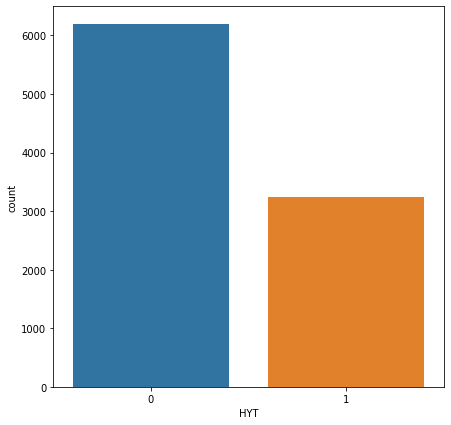

In [58]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(x='HYT', data = data)

In [59]:
data['HYT'] = data['HYT'].astype(float)

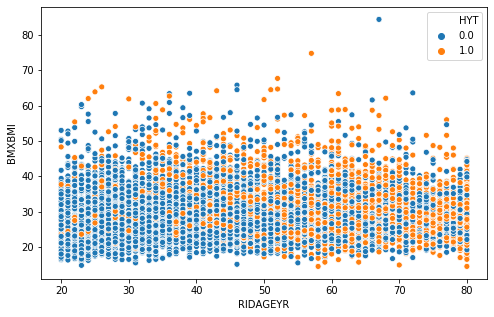

In [60]:
import pandas as pd
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data = data, x ='RIDAGEYR', y = 'BMXBMI', hue = 'HYT')

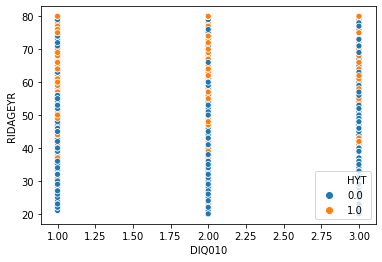

In [61]:

import pandas as pd
import seaborn as sns
sns.scatterplot(data = data, x ='DIQ010', y = 'RIDAGEYR', hue = 'HYT')

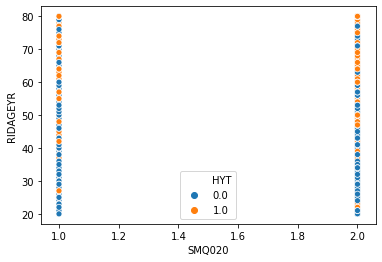

In [62]:

import pandas as pd
import seaborn as sns
#I read the csv churn data into variable called df. Here I would only use two continuous features CreditScore and Age with the target Exited
sns.scatterplot(data = data, x ='SMQ020', y = 'RIDAGEYR', hue = 'HYT')

# Drop the Outliers present in Majority class

In [63]:
rslt_df = data[data['HYT'] == 0]

In [64]:
rslt_df.shape

(6189, 8)

In [65]:
Q1 = rslt_df.quantile(0.25)
Q3 = rslt_df.quantile(0.75)
IQR = Q3 - Q1

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [66]:
(rslt_df > (Q3 + 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI      145
DIQ010      148
SMQ020        0
KIQ022        0
HYT           0
dtype: int64

In [67]:
(rslt_df < (Q1 - 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI        0
DIQ010      718
SMQ020        0
KIQ022      164
HYT           0
dtype: int64

In [68]:
rslt_out = rslt_df[~((rslt_df < (Q1 - 1.5 * IQR)) |(rslt_df > (Q3 + 1.5 * IQR))).any(axis=1)]
rslt_out.shape

(5121, 8)

In [69]:
rslt_out.shape

(5121, 8)

In [70]:
rslt_df.shape

(6189, 8)

# Drop outliers in minority class

In [71]:
rslt_df_min = data[data['HYT'] == 1]
rslt_df_min.shape

(3242, 8)

In [72]:
Q1 = rslt_df_min.quantile(0.25)
Q3 = rslt_df_min.quantile(0.75)
IQR = Q3 - Q1

In [73]:
(rslt_df_min > (Q3 + 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI      106
DIQ010      102
SMQ020        0
KIQ022        0
HYT           0
dtype: int64

In [74]:
(rslt_df_min < (Q1 - 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI        0
DIQ010      691
SMQ020        0
KIQ022      197
HYT           0
dtype: int64

In [75]:
rslt_df_min['DIQ010'].value_counts()

2.0    2449
1.0     691
3.0     102
Name: DIQ010, dtype: int64

In [76]:
rslt_df_min['KIQ022'].value_counts()

2.0    3045
1.0     197
Name: KIQ022, dtype: int64

In [77]:
Q1 = rslt_df_min["BMXBMI"].quantile(0.25)
Q3 = rslt_df_min["BMXBMI"].quantile(0.75)
IQR = Q3 - Q1

In [78]:
rslt_out_min = rslt_df_min[~((rslt_df_min["BMXBMI"] < (Q1 - 1.5 * IQR)) | (rslt_df_min["BMXBMI"] > (Q3 + 1.5 * IQR)))]

In [79]:
rslt_out_min.shape

(3136, 8)

# final_data data is used for our analysis

In [80]:
frames = [rslt_out, rslt_out_min]
final_data = pd.concat(frames)

In [81]:
final_data.to_csv('nhanes.csv')

In [82]:
final_data.shape

(8257, 8)

In [83]:
final_data_numpy = final_data.values

In [84]:
final_data_numpy.shape

(8257, 8)

In [85]:
final_data_numpy[0]

array([ 2. , 75. ,  4. , 38.9,  2. ,  1. ,  2. ,  0. ])

In [86]:
X, Y = final_data_numpy[:,:-1], final_data_numpy[:,-1]

In [87]:
X[0]

array([ 2. , 75. ,  4. , 38.9,  2. ,  1. ,  2. ])

In [88]:
Y[0]

0.0

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E653EE8348>,
      dtype=object)

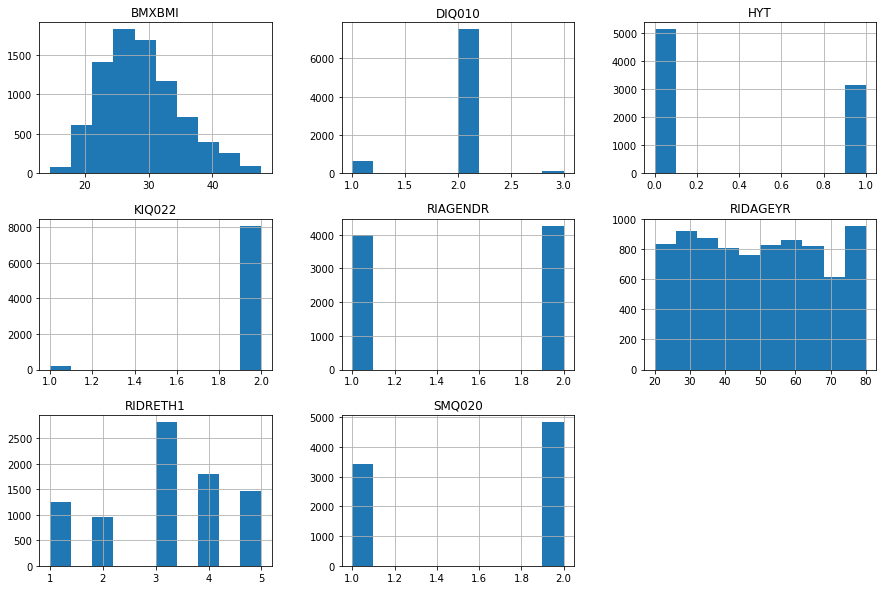

In [89]:
final_data.hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E653095408>,
      dtype=object)

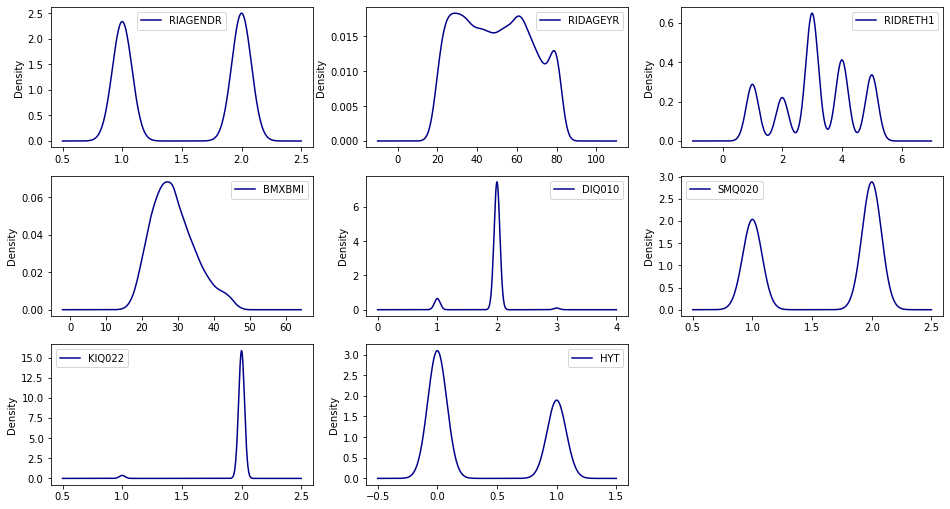

In [90]:
final_data.plot(kind = 'density', subplots=True, layout=(5,3), sharex = False, figsize=(16,15), color = 'darkblue' )

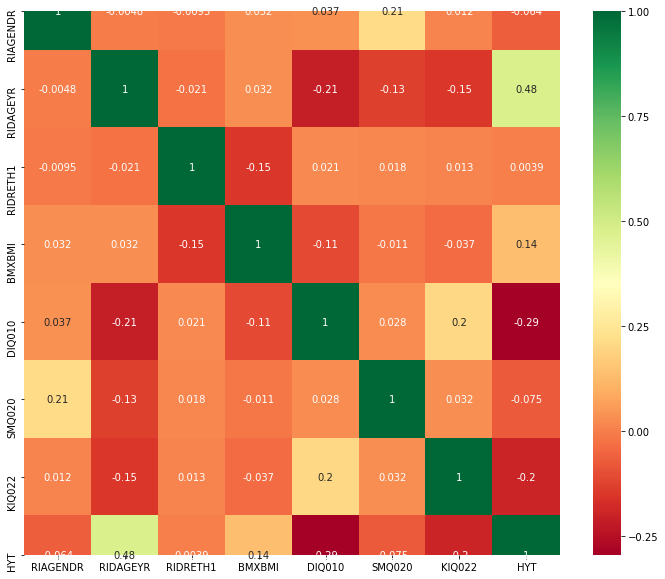

In [91]:
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
g=sns.heatmap(final_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# class imbalance

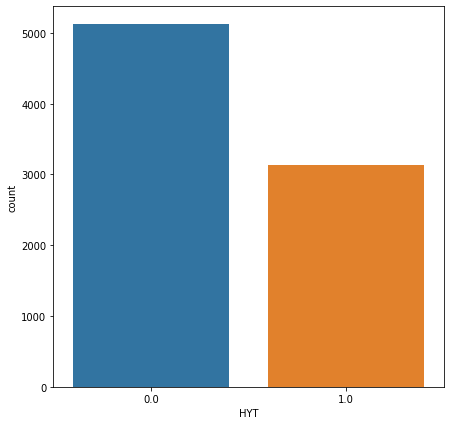

In [92]:
plt.figure(figsize=(7,7))
sns.countplot(x='HYT', data = final_data)

# class overlap

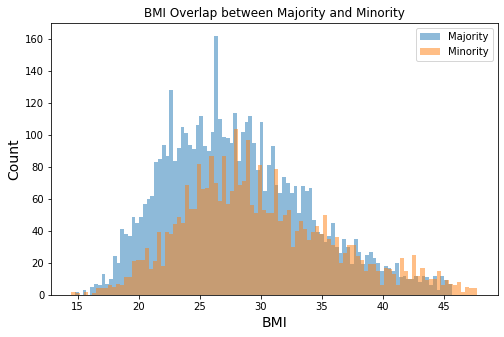

In [93]:
plt.figure(figsize=(8,5))
plt.hist(rslt_out['BMXBMI'], bins=100, alpha=0.5, label="Majority")
plt.hist(rslt_out_min['BMXBMI'], bins=100, alpha=0.5, label="Minority")
plt.xlabel("BMI", size=14)
plt.ylabel("Count", size=14)
plt.title("BMI Overlap between Majority and Minority")
plt.legend(loc='upper right')

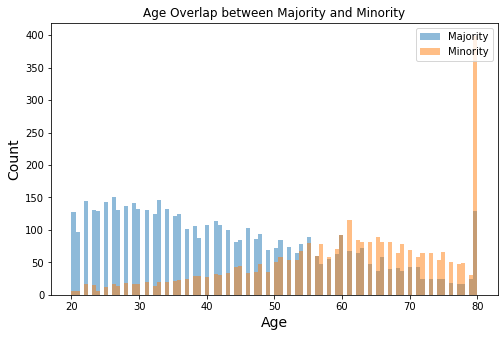

In [133]:
plt.figure(figsize=(8,5))
plt.hist(rslt_out['RIDAGEYR'], bins=100, alpha=0.5, label="Majority")
plt.hist(rslt_out_min['RIDAGEYR'], bins=100, alpha=0.5, label="Minority")
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("Age Overlap between Majority and Minority")
plt.legend(loc='upper right')

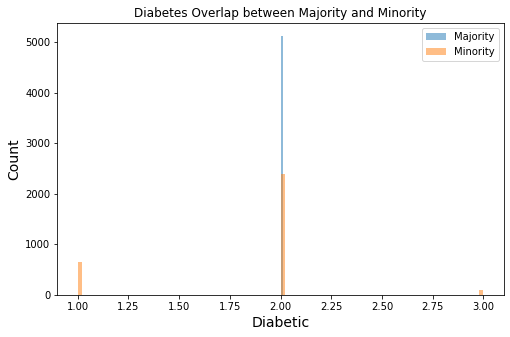

In [94]:
plt.figure(figsize=(8,5))
plt.hist(rslt_out['DIQ010'], bins=100, alpha=0.5, label="Majority")
plt.hist(rslt_out_min['DIQ010'], bins=100, alpha=0.5, label="Minority")
plt.xlabel("Diabetic", size=14)
plt.ylabel("Count", size=14)
plt.title("Diabetes Overlap between Majority and Minority")
plt.legend(loc='upper right')

# Scatter Plot

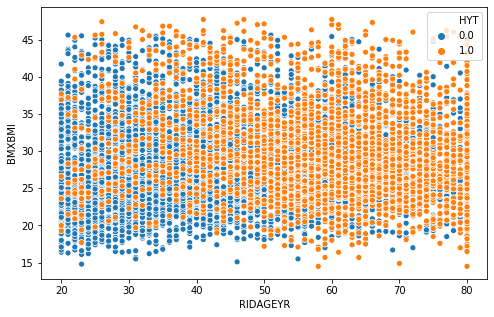

In [95]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data = final_data, x ='RIDAGEYR', y = 'BMXBMI', hue = 'HYT')

# K-means UnderSampling

In [96]:
''' 
cluster function take data as input need to be clustered and 
return the resultant cluster and silhouette score
'''
def cluster(data):
    from sklearn.cluster import KMeans
    feature = data[:, :-1]
    target = data[:,-1]
    kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
    kmeans.fit(feature)
    pred = kmeans.predict(feature)
    from sklearn.metrics import silhouette_score
    sil_score = silhouette_score(feature, kmeans.labels_, metric='euclidean')
    frame_data = pd.DataFrame(data)
    frame_data['cluster'] = pred
    array_data = frame_data.values
    cluster_0 = array_data[np.nonzero(array_data[:,-1]==0)]
    cluster_0_data = cluster_0[:, :-1]
    cluster_1 = array_data[np.nonzero(array_data[:,-1]==1)]
    cluster_1_data = cluster_1[:, :-1]
    return cluster_0_data, cluster_1_data, sil_score

In [97]:
'''
combine function combine all the cluster data with each other,
it take all the cluster data and return the combined sub-data formed
'''
def combine(Min_0, Min_1, Maj_0, Maj_1):
    sd_00 = np.concatenate((Min_0, Maj_0))
    sd_01 = np.concatenate((Min_0, Maj_1))
    sd_10 = np.concatenate((Min_1, Maj_0))
    sd_11 = np.concatenate((Min_1, Maj_1))
    return sd_00, sd_01, sd_10, sd_11

In [98]:
''' 
silhouette_largest function take all the subdata formed by combine function as input 
then apply the cluster function on the sub data, and get the silhouette score for each sub data
return majority cluster from sub data having the largest silhouette score and the largest silhouette score
 '''
def silhouette_largest(k1, k2, k3, k4):
    X1, Y1, s1 = cluster(k1)
    X2, Y2, s2 = cluster(k2)
    X3, Y3, s3 = cluster(k3)
    X4, Y4, s4 = cluster(k4)
    lar_sil = max(s1, s2, s3, s4)
    if(lar_sil == s1):
        majority_cluster_data = k1[np.nonzero(k1[:,-1]==0)]
    elif(lar_sil == s2):
        majority_cluster_data = k2[np.nonzero(k2[:,-1]==0)]
    elif(lar_sil == s3):
        majority_cluster_data = k3[np.nonzero(k3[:,-1]==0)]
    else:
        majority_cluster_data = k4[np.nonzero(k4[:,-1]==0)]
    return  majority_cluster_data, lar_sil

In [99]:
'''
KUS function is the main function for performing the k-means undersampling
it takes training data as input, and sepeare the majority and minority class.
Then apply cluster function on minority and majority class data. 
Later it apply the combine function on the resultant cluster.
Find the majority cluster with largest silhouette score using silhouette_largest function.
Return the resultant data formed by joining the selected majority cluster and the minority data.
'''
def KUS(X,Y):
    data = np.column_stack([X,Y]) #separate the majority and minority class
    Maj = data[np.nonzero(data[:,-1]==0)]
    Min = data[np.nonzero(data[:,-1]==1)]
    #call 'cluster' function to cluster the minority class instances
    Min_0, Min_1, sil_min = cluster(Min) 
    #call 'cluster' function to cluster the majority class instances
    Maj_0, Maj_1, sil_maj = cluster(Maj) 
    #call 'combine' function to combine the minority and majority clusters with each other
    sd_00, sd_01, sd_10, sd_11 = combine(Min_0,Min_1,Maj_0,Maj_1)
    #call 'silhouette_largest' function to find the highest silhouette score 
    majority_cluster, lar_sil_score = silhouette_largest(sd_00, sd_01, sd_10, sd_11) 
    #combine minority data with majority cluster having highest silhouette score
    training_data = np.concatenate((Min, majority_cluster)) 
    X_train_kus, Y_train_kus = training_data[:,:-1], training_data[:,-1]
    #return array of input features and array of their corresponding class
    return X_train_kus, Y_train_kus

# Model Training

In [100]:
## import the libraries required for the classification, validation and comparison. 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.under_sampling import RandomUnderSampler

In [101]:
'''KUS_model_training function will train the classifiers on the training data 
obtained after applying KUS function and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba'''
def KUS_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        KUS_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        KUS_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        KUS_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        KUS_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        KUS_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return KUS_MLA_compare,row_index

In [102]:
'''
original_model_training function will train the classifiers on 
the original training data and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba
'''
def original_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        original_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        original_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        original_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        original_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        original_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return original_MLA_compare,row_index

In [103]:
'''
smote_model_training function will train the classifiers on the training data 
obtained after applying smote algorithm and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba
'''
def smote_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        smote_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        smote_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        smote_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        smote_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        smote_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return smote_MLA_compare,row_index

In [104]:
'''
bsmote_model_training function will train the classifiers on the training data 
obtained after applying borderline-smote algorithm and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba
'''
def bsmote_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        bsmote_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        bsmote_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        bsmote_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        bsmote_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        bsmote_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return bsmote_MLA_compare,row_index

In [105]:
'''
ksmote_model_training function will train the classifiers on the training data 
obtained after applying k-means smote algorithm and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba
'''
def ksmote_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        ksmote_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        ksmote_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        ksmote_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        ksmote_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        ksmote_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return ksmote_MLA_compare,row_index

In [106]:
'''
svmsmote_model_training function will train the classifiers on the training data 
obtained after applying svm-smote algorithm and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba
'''
def svmsmote_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        svmsmote_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        svmsmote_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        svmsmote_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        svmsmote_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        svmsmote_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return svmsmote_MLA_compare,row_index

In [107]:
'''
ru_model_training function will train the classifiers on the training data 
obtained after applying random undersampling algorithm and evaluate the model performance on test data. 
The performance metrics used for performance evaluation are recall. f1-score, gmean and iba
'''
def ru_model_training(x_train, y_train, x_test, y_test,row_index):
    #row_index = 0
    for alg in MLA:
        predicted = alg.fit(x_train, y_train).predict(x_test)
        MLA_name = alg.__class__.__name__
        ru_MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        report = classification_report_imbalanced(y_test, predicted,labels = [0,1], output_dict=True)
        ru_MLA_compare.loc[row_index, 'MLA Recall'] = round(report[1]['rec'],2)
        ru_MLA_compare.loc[row_index, 'MLA f1-score'] = round(report[1]['f1'],2)
        ru_MLA_compare.loc[row_index, 'MLA g-mean'] = round(report[1]['geo'],2)
        ru_MLA_compare.loc[row_index, 'MLA iba'] = round(report[1]['iba'],2)
        row_index+=1
    return ru_MLA_compare,row_index

In [108]:
## make a list of classifiers used for model training
## SVM, NB, KNN, RF, MLP 
MLA = [CalibratedClassifierCV(LinearSVC(random_state=0)),
       GaussianNB(),
      KNeighborsClassifier(),
      RandomForestClassifier(n_estimators=100),
      MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)]

In [109]:
## dataframe to store result during model training of resampling method
MLA_columns = []
KUS_MLA_compare = pd.DataFrame(columns = MLA_columns) #KUS
original_MLA_compare = pd.DataFrame(columns = MLA_columns) #original
smote_MLA_compare = pd.DataFrame(columns = MLA_columns) #smote
bsmote_MLA_compare = pd.DataFrame(columns = MLA_columns) #borderline-smore
ksmote_MLA_compare = pd.DataFrame(columns = MLA_columns) #kmeans smote
svmsmote_MLA_compare = pd.DataFrame(columns = MLA_columns) #svm smote
ru_MLA_compare = pd.DataFrame(columns = MLA_columns) #random undersampling

In [110]:
from sklearn.model_selection import StratifiedKFold

## array to store result for each fold obtained after model training.
original_result = [] # original data result 
smote_result = [] # smote data result 
bsmote_result = [] # borderline-smote data result 
kmeans_smote_result = [] # kmeans smote data result 
svm_smote_result = [] # svm data result 
ru_result = [] # random undersampling data result 
KUS_result = [] # KUS data result 

## initialization for row_index
k = o = s = bs = ks = ss = ru = 0

## stratified kfold with k =5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 

## evaluate the model using 5-fold
for train_index, test_index in skf.split(X,Y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    
    ## Resample data using KUS and perform model training on KUS data
    X_train_kus, Y_train_kus = KUS( X_train_fold,y_train_fold)
    KUS_result,k = KUS_model_training(X_train_kus, Y_train_kus,X_test_fold,y_test_fold,k)
    
    ## Perform model training on original data
    original_result,o = original_model_training(X_train_fold, y_train_fold,X_test_fold,y_test_fold,o)
    
    ## Resample data using SMOTE and perform model training on SMOTE data
    sm = SMOTE(random_state=0)
    X_train_sm, Y_train_sm = sm.fit_resample(X_train_fold, y_train_fold.ravel())
    smote_result,s = smote_model_training(X_train_sm, Y_train_sm ,X_test_fold,y_test_fold,s)
    
    ## Resample data using Borderline-SMOTE and perform model training on Borderline-SMOTE data
    bsm = BorderlineSMOTE(random_state=0)
    X_train_bsm, Y_train_bsm = bsm.fit_resample(X_train_fold, y_train_fold)
    bsmote_result,bs = bsmote_model_training(X_train_bsm, Y_train_bsm ,X_test_fold,y_test_fold,bs)
    
    ## Resample data using K-means SMOTE and perform model training on K-means SMOTE data
    ksm = KMeansSMOTE()
    X_train_ksm, Y_train_ksm = ksm.fit_resample(X_train_fold, y_train_fold)
    kmeans_smote_result,ks = ksmote_model_training(X_train_ksm, Y_train_ksm ,X_test_fold,y_test_fold,ks)
    
    ## Resample data using SVM SMOTE and perform model training on SVM SMOTE data
    svmsm = SVMSMOTE(random_state=0)
    X_train_svm, Y_train_svm = svmsm.fit_resample(X_train_fold, y_train_fold)
    svm_smote_result,ss = svmsmote_model_training(X_train_svm, Y_train_svm ,X_test_fold,y_test_fold,ss)
    
    ## Resample data using Random Undersampling and perform model training on Random Undersampling data
    rus = RandomUnderSampler(random_state=0)
    X_train_ru, Y_train_ru  = rus.fit_resample(X_train_fold, y_train_fold)
    ru_smote_result,ru = ru_model_training(X_train_ru, Y_train_ru ,X_test_fold,y_test_fold,ru)
    

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.p

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

# Mean of the result for each fold

In [154]:
## Result obtained from model training for each resampled algorithm
# mean of each fold result obtained by model training on KUS data 
df_KUS=pd.DataFrame(KUS_result)
KUS_mean = df_KUS.groupby("MLA Name").mean()
KUS_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.864,0.684,0.718,0.528
GaussianNB,0.438,0.570,0.640,0.390
KNeighborsClassifier,0.838,0.678,0.716,0.526
MLPClassifier,0.850,0.684,0.716,0.526
RandomForestClassifier,0.858,0.684,0.718,0.526


In [155]:
# mean of each fold result obtained by model training on original data 
df_original=pd.DataFrame(original_result)
original_mean = df_original.groupby("MLA Name").mean()
original_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.554,0.618,0.690,0.460
GaussianNB,0.270,0.426,0.520,0.252
KNeighborsClassifier,0.550,0.598,0.670,0.438
MLPClassifier,0.638,0.654,0.716,0.504
RandomForestClassifier,0.584,0.620,0.692,0.466


In [156]:
# mean of each fold result obtained from model training on SMOTE data 
df_smote=pd.DataFrame(smote_result)
smote_mean = df_smote.groupby("MLA Name").mean()
smote_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.726,0.674,0.734,0.536
GaussianNB,0.270,0.426,0.520,0.252
KNeighborsClassifier,0.670,0.626,0.696,0.476
MLPClassifier,0.770,0.682,0.736,0.544
RandomForestClassifier,0.596,0.624,0.694,0.472


In [157]:
# mean of each fold result obtained from model training on Borderline-SMOTE data 
df_bsmote=pd.DataFrame(bsmote_result)
bsmote_mean = df_bsmote.groupby("MLA Name").mean()
bsmote_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.740,0.674,0.732,0.536
GaussianNB,0.270,0.426,0.520,0.252
KNeighborsClassifier,0.684,0.618,0.680,0.464
MLPClassifier,0.804,0.680,0.732,0.540
RandomForestClassifier,0.604,0.624,0.694,0.472


In [162]:
# mean of each fold result obtained from model training on K-means SMOTE data 
df_kmeans_smote=pd.DataFrame(kmeans_smote_result)
kmeans_smote_mean = df_kmeans_smote.groupby("MLA Name").mean()
kmeans_smote_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.644,0.656,0.718,0.510
GaussianNB,0.270,0.426,0.520,0.252
KNeighborsClassifier,0.606,0.620,0.692,0.468
MLPClassifier,0.694,0.672,0.730,0.530
RandomForestClassifier,0.590,0.624,0.694,0.470


In [160]:
# mean of each fold result obtained from model training on SVM-SMOTE data 
df_svm_smote=pd.DataFrame(svm_smote_result)
svmsmote_mean = df_svm_smote.groupby("MLA Name").mean()
svmsmote_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.734,0.674,0.728,0.532
GaussianNB,0.270,0.426,0.520,0.252
KNeighborsClassifier,0.668,0.622,0.690,0.472
MLPClassifier,0.810,0.684,0.730,0.536
RandomForestClassifier,0.600,0.628,0.696,0.476


In [161]:
# mean of each fold result obtained from model training on Random Undersampling data 
df_ru=pd.DataFrame(ru_smote_result)
ru_mean = df_ru.groupby("MLA Name").mean()
ru_mean

,MLA Recall,MLA f1-score,MLA g-mean,MLA iba
MLA Name,,,,
CalibratedClassifierCV,0.720,0.672,0.730,0.530
GaussianNB,0.270,0.426,0.520,0.252
KNeighborsClassifier,0.686,0.636,0.700,0.490
MLPClassifier,0.764,0.682,0.736,0.542
RandomForestClassifier,0.692,0.650,0.710,0.502


# Result  grouped by classifiers used

In [163]:
# convert result into numpy array
kus_arr = KUS_mean.values
original_arr = original_mean.values
smote_arr = smote_mean.values
bsmote_arr = bsmote_mean.values
ksmote_arr = kmeans_smote_mean.values
svmsmote_arr = svmsmote_mean.values
ru_arr = ru_mean.values

In [176]:
#svm
svm_result = [kus_arr[0],original_arr[0],smote_arr[0],bsmote_arr[0],ksmote_arr[0],svmsmote_arr[0],ru_arr[0]]
#naive bayes
nb_result = [kus_arr[1],original_arr[1],smote_arr[1],bsmote_arr[1],ksmote_arr[1],svmsmote_arr[1],ru_arr[1]]
#knn
knn_result = [kus_arr[2],original_arr[2],smote_arr[2],bsmote_arr[2],ksmote_arr[2],svmsmote_arr[2],ru_arr[2]]
#mlp
mlp_result = [kus_arr[3],original_arr[3],smote_arr[3],bsmote_arr[3],ksmote_arr[3],svmsmote_arr[3],ru_arr[3]]
#rf
rf_result = [kus_arr[4],original_arr[4],smote_arr[4],bsmote_arr[4],ksmote_arr[4],svmsmote_arr[4],ru_arr[4]]


In [179]:
#svm
svm_df = pd.DataFrame(data = svm_result, 
                        columns = ["Recall","F1-score", "Gmean", "IBA"])
svm_df.insert(0, "Resampling", ["KUS", "Original", "SMOTE","Borderline-SMOTE",
                                "Kmeans-SMOTE", "SVM-SMOTE", "Random UnderSampling"])

#naive bayes
nb_df = pd.DataFrame(data = nb_result,  
                        columns = ["Recall", "F1-score", "Gmean", "IBA"])
nb_df.insert(0, "Resampling", ["KUS", "Original", "SMOTE","Borderline-SMOTE", 
                               "Kmeans-SMOTE", "SVM-SMOTE", "Random UnderSampling"])

#knn
knn_df = pd.DataFrame(data = knn_result, 
                        columns = ["Recall","F1-score", "Gmean", "IBA"])
knn_df.insert(0, "Resampling", ["KUS", "Original", "SMOTE","Borderline-SMOTE",
                                "Kmeans-SMOTE", "SVM-SMOTE", "Random UnderSampling"])

#mlp
mlp_df = pd.DataFrame(data = mlp_result,  
                        columns = ["Recall", "F1-score", "Gmean", "IBA"])
mlp_df.insert(0, "Resampling", ["KUS", "Original", "SMOTE","Borderline-SMOTE", 
                                "Kmeans-SMOTE", "SVM-SMOTE", "Random UnderSampling"])


#rf
rf_df = pd.DataFrame(data = rf_result,  
                        columns = ["Recall","F1-score", "Gmean", "IBA"])
rf_df.insert(0, "Resampling", ["KUS", "Original", "SMOTE","Borderline-SMOTE",
                               "Kmeans-SMOTE", "SVM-SMOTE", "Random UnderSampling"])



In [180]:
# SVM Result
svm_df 

,Resampling,Recall,F1-score,Gmean,IBA
0,KUS,0.864,0.684,0.718,0.528
1,Original,0.554,0.618,0.690,0.460
2,SMOTE,0.726,0.674,0.734,0.536
3,Borderline-SMOTE,0.740,0.674,0.732,0.536
4,Kmeans-SMOTE,0.644,0.656,0.718,0.510
5,SVM-SMOTE,0.734,0.674,0.728,0.532
6,Random UnderSampling,0.720,0.672,0.730,0.530


In [181]:
# NB Result
nb_df

,Resampling,Recall,F1-score,Gmean,IBA
0,KUS,0.438,0.570,0.64,0.390
1,Original,0.270,0.426,0.52,0.252
2,SMOTE,0.270,0.426,0.52,0.252
3,Borderline-SMOTE,0.270,0.426,0.52,0.252
4,Kmeans-SMOTE,0.270,0.426,0.52,0.252
5,SVM-SMOTE,0.270,0.426,0.52,0.252
6,Random UnderSampling,0.270,0.426,0.52,0.252


In [182]:
# KNN Result
knn_df

,Resampling,Recall,F1-score,Gmean,IBA
0,KUS,0.838,0.678,0.716,0.526
1,Original,0.550,0.598,0.670,0.438
2,SMOTE,0.670,0.626,0.696,0.476
3,Borderline-SMOTE,0.684,0.618,0.680,0.464
4,Kmeans-SMOTE,0.606,0.620,0.692,0.468
5,SVM-SMOTE,0.668,0.622,0.690,0.472
6,Random UnderSampling,0.686,0.636,0.700,0.490


In [183]:
# RF Result
rf_df

,Resampling,Recall,F1-score,Gmean,IBA
0,KUS,0.858,0.684,0.718,0.526
1,Original,0.584,0.620,0.692,0.466
2,SMOTE,0.596,0.624,0.694,0.472
3,Borderline-SMOTE,0.604,0.624,0.694,0.472
4,Kmeans-SMOTE,0.590,0.624,0.694,0.470
5,SVM-SMOTE,0.600,0.628,0.696,0.476
6,Random UnderSampling,0.692,0.650,0.710,0.502


In [184]:
# MLP Result
mlp_df

,Resampling,Recall,F1-score,Gmean,IBA
0,KUS,0.850,0.684,0.716,0.526
1,Original,0.638,0.654,0.716,0.504
2,SMOTE,0.770,0.682,0.736,0.544
3,Borderline-SMOTE,0.804,0.680,0.732,0.540
4,Kmeans-SMOTE,0.694,0.672,0.730,0.530
5,SVM-SMOTE,0.810,0.684,0.730,0.536
6,Random UnderSampling,0.764,0.682,0.736,0.542


# Result Visualization for each resampled algorithm grouped by the classifiers

Text(0.5, 1.0, 'Line Plot for SVM Classifier')

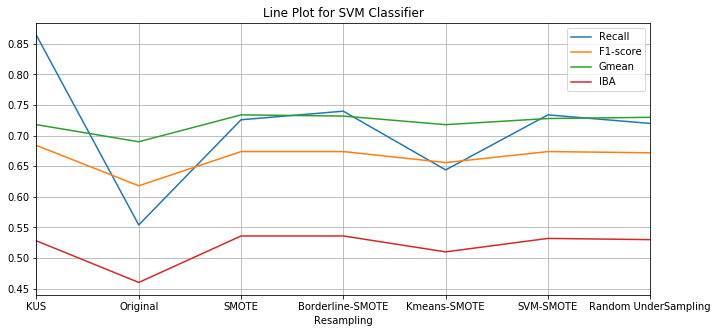

In [185]:
#SVM
svm_df.plot(x='Resampling', y=['Recall', 'F1-score', 'Gmean', 'IBA'], figsize=(11,5), grid=True)
plt.title("Line Plot for SVM Classifier")

Text(0.5, 1.0, 'Line Plot for Naive Bayes Classifier')

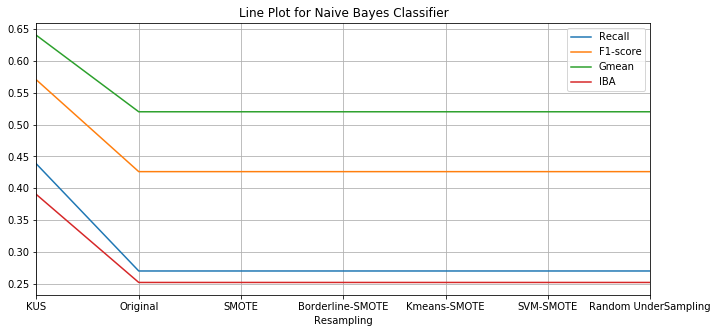

In [186]:
#Naive Bayes
nb_df.plot(x='Resampling', y=['Recall', 'F1-score', 'Gmean', 'IBA'], figsize=(11,5), grid=True)
plt.title("Line Plot for Naive Bayes Classifier")

Text(0.5, 1.0, 'Line Plot for KNN Classifier')

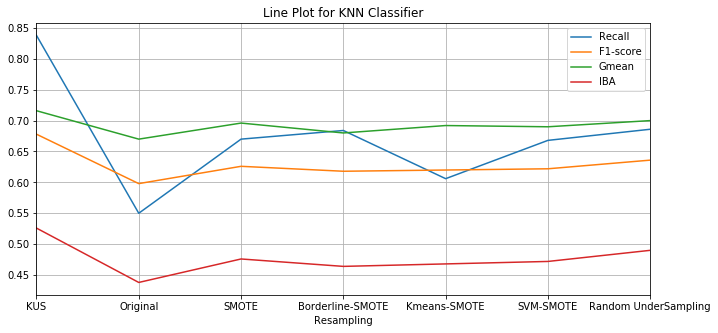

In [187]:
#KNN
knn_df.plot(x='Resampling', y=['Recall', 'F1-score', 'Gmean', 'IBA'], figsize=(11,5), grid=True)
plt.title("Line Plot for KNN Classifier")

Text(0.5, 1.0, 'Line Plot for Random Forest Classifier')

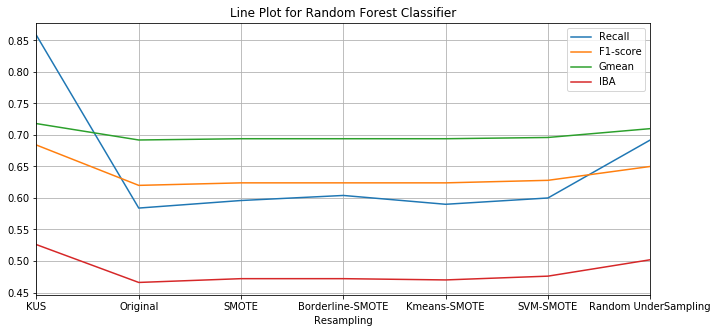

In [188]:
#Random Forest
rf_df.plot(x='Resampling', y=['Recall', 'F1-score', 'Gmean', 'IBA'], figsize=(11,5), grid=True)
plt.title("Line Plot for Random Forest Classifier")

Text(0.5, 1.0, 'Line Plot for Multilayer Perceptron')

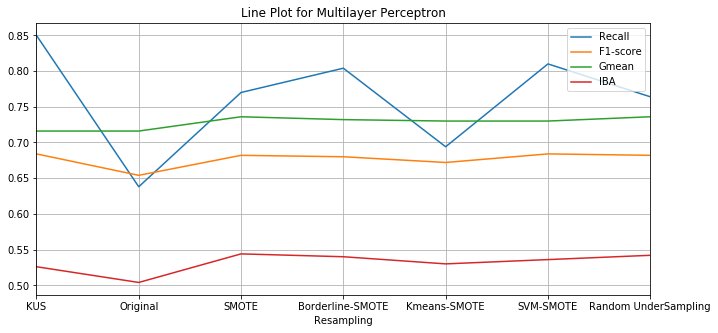

In [189]:
#Multilayer Perceptron
mlp_df.plot(x='Resampling', y=['Recall', 'F1-score', 'Gmean', 'IBA'], figsize=(11,5), grid=True)
plt.title("Line Plot for Multilayer Perceptron")